In [32]:
%load_ext autoreload
%autoreload 2
from new_predictor import *
from new_predictor_util import *
from new_predictor_graph import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [793]:
import warnings
warnings.filterwarnings("ignore")

# Parameters


In [33]:
n_stations = 100 #max 435
n_timesteps= 100 # max 52076
k = min(round(n_timesteps/5),10)
print(k)
p_noise_stations = 0.20
p_noise_timesteps= 0.20
min_noises = 6
max_noises = 6



10


# Initiate class / object


In [34]:
data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations, p_noise_timesteps, min_noises, max_noises, False)
ts_data = data.ts_data
neighbor = data._neighbor
lst_corrupted_stations = list(data.dic_timesteps.keys())

smoothpredictor = SmoothingAndPredict()
spatialcomparision = SpatialComparision()

executorNew = Executor(data, smoothpredictor)
executorOld = Executor(data, spatialcomparision)

40149


# Data Exploration

### Plotting trends by a random station and its neighbor

### a station with noises

Text(0.5, 1.0, '32')

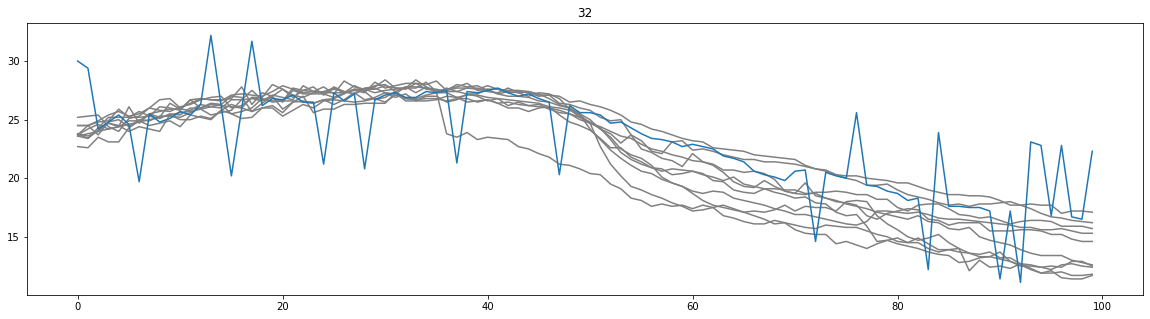

In [4]:
station = np.random.choice(list(data.dic_timesteps.keys()))
plt.figure(figsize=(20,5))
plt.plot(data.ts_data[neighbor[station]].T, color='grey')
plt.plot(data.ts_data[station])
plt.title(station)

### a station without noise

Text(0.5, 1.0, '1')

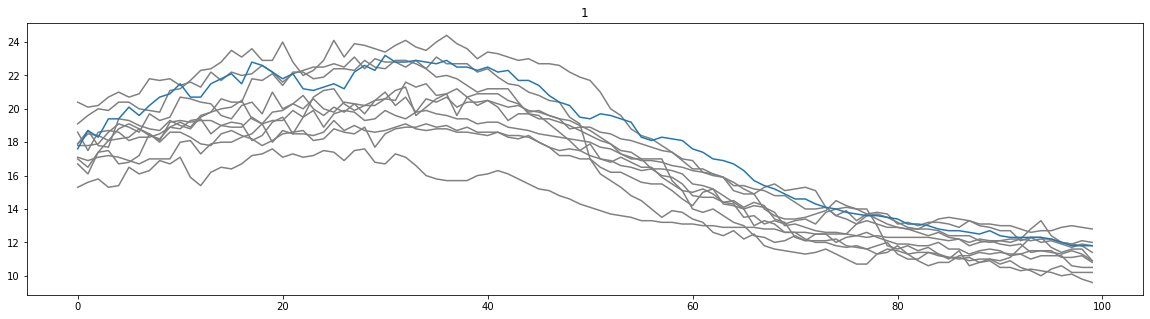

In [5]:
plt.figure(figsize=(20,5))
station = np.random.choice(range(n_stations))
plt.plot(data.ts_rawdata[neighbor[station]].T, color='grey')
plt.plot(data.ts_rawdata[station])
plt.title(station)

### Plotting Noises 

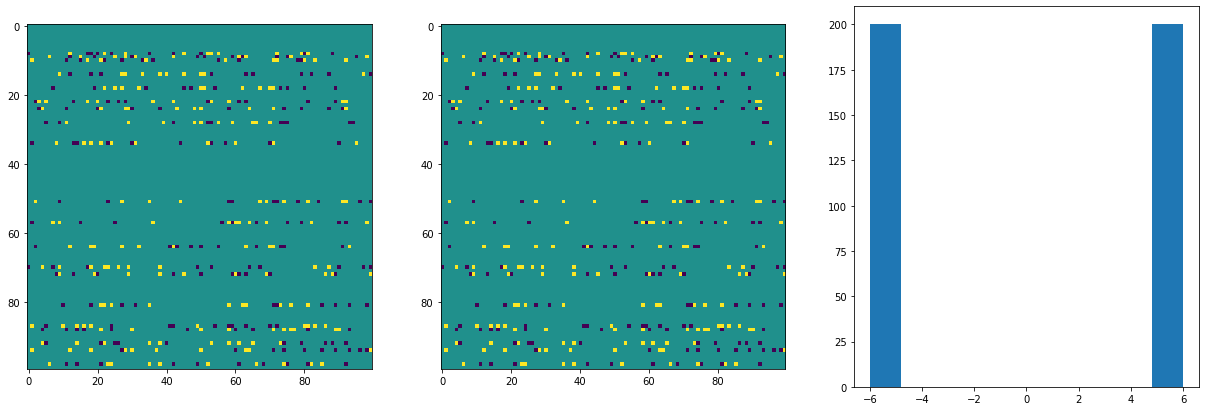

In [35]:
plot_noises(data)

# Test with a station randomly selected 

### Test for a station with noises


In [36]:

station, idx_stations_w_noises = pick_station_randomly(neighbor, lst_corrupted_stations, w_noise=False)
answer, pred_by_new, pred_by_old  = validate_for_comparision(executorNew, executorOld, neighbor, station, idx_stations_w_noises, data.dic_timesteps, output=True)

Station: 57 	 w. corrupted neighbors: [24] 
	 Answer:          : 0, 	 [1, 7, 9, 15, 25, 36, 56, 58, 59, 60, 61, 64, 66, 69, 75, 79, 82, 90, 92, 98]
	 Predicted by new : 0, 	 [1, 7, 9, 15, 25, 36, 56, 58, 59, 60, 61, 64, 66, 69, 75, 79, 82, 90, 92, 98]
	 Predicted by old : 3, 	 [1, 7, 9, 25, 36, 56, 58, 59, 60, 61, 66, 69, 75, 82, 90, 92, 98]


### Test for False Positive by the previous predictor

station = pick_FS_station(executorNew, executorOld, neighbor, idx_stations_w_noises, data.dic_timesteps)
answer, pred_by_new, pred_by_old  = validate_for_comparision(executorNew, executorOld, neighbor, station, idx_stations_w_noises, data.dic_timesteps)

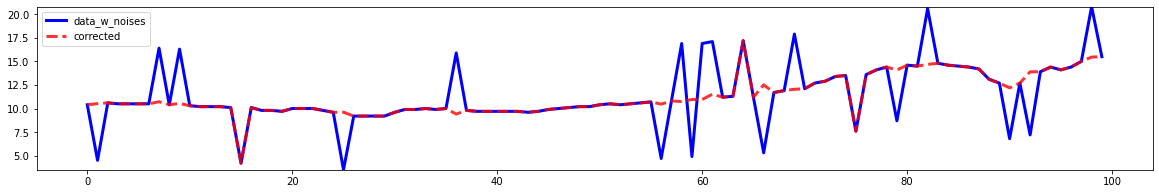

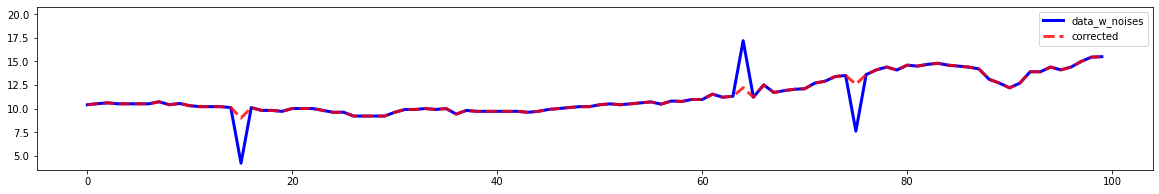

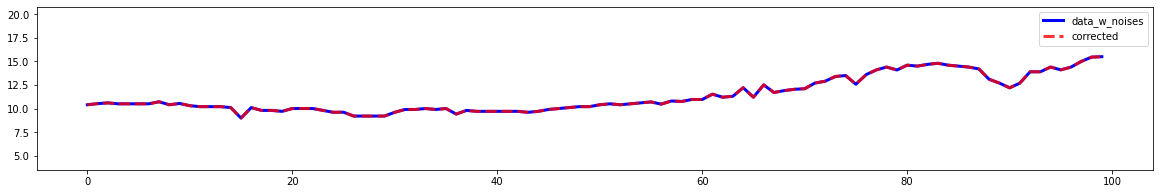

In [37]:
X = ts_data[neighbor[station]]
y = ts_data[station]
corrected_y = smoothpredictor.correct(X, y, True)

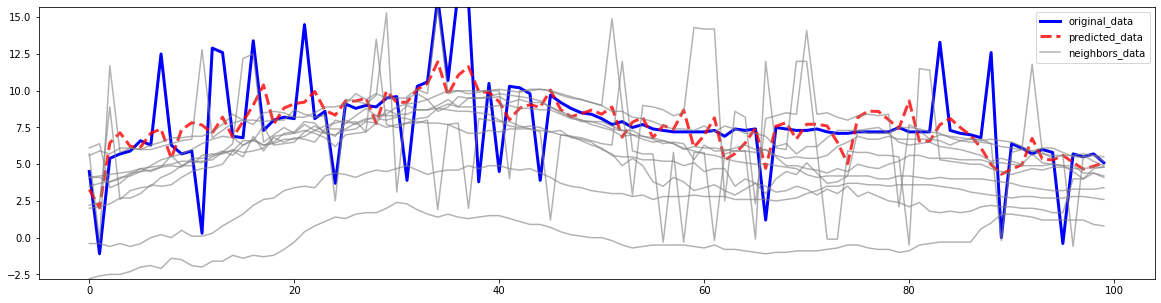

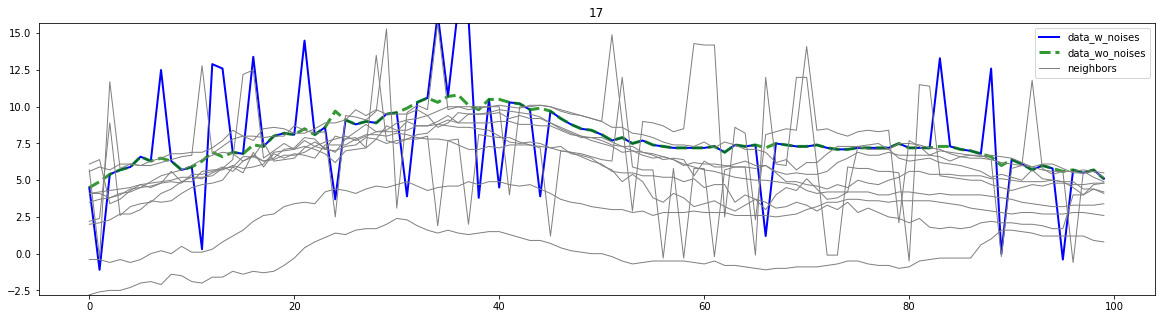

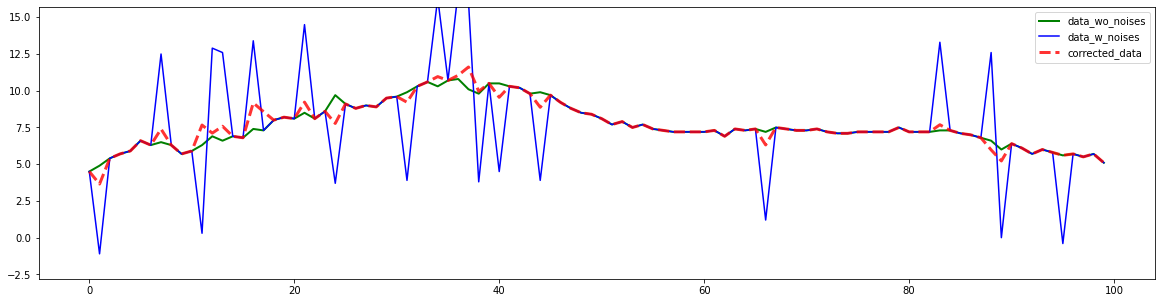

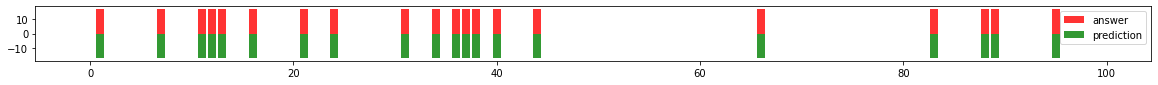

In [31]:
plot_indicators(data, station, pred_by_new, answer, smoothpredictor)

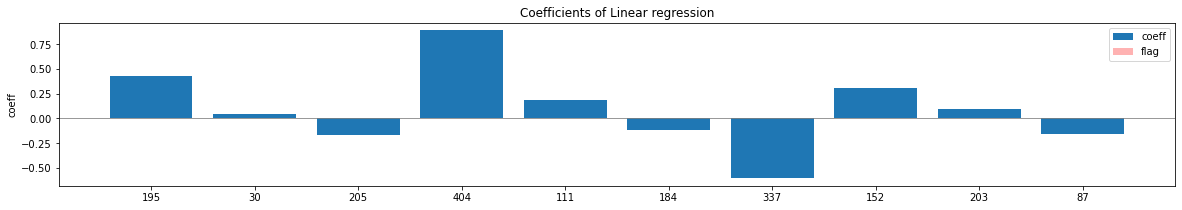

In [15]:
plot_coefficient(data, station, k, lst_corrupted_stations)

# Overall Evaluation

In [ ]:
overall_evaluation(executorNew, executorOld)

# Experiments with different Parameters

In [789]:
%load_ext autoreload
%autoreload 2
from new_predictor import *
from new_predictor_util import *
from new_predictor_graph import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [790]:
n_stations = 456
n_timesteps= 100
k = min(round(n_timesteps/3),10)
print(k)

k=10
p_noise_stations = 0.01
p_noise_timesteps= 0.01
min_noises = 5
max_noises = 10

10


In [791]:
lst = [10215, 16246]

# data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations, p_noise_timesteps, min_noises, max_noises, True)
data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations, p_noise_timesteps, min_noises, max_noises, True, 10215)


smoothpredictor = SmoothingAndPredict()
spatialcomparision = SpatialComparision()
huberregressor = HuberRegressor()
ensembleRegression = EnsembleRegression()

executorNew = Executor(data, smoothpredictor)
executorHuber = Executor(data, huberregressor)
executorOld = Executor(data, spatialcomparision)

ts_data = data.ts_data
neighbor = data._neighbor
lst_corrupted_stations = list(data.dic_timesteps.keys())


10215


In [794]:
overall_evaluation(executorNew, executorHuber)

Type	Prec	 Recall	 F1	 runtime
 New	 0.156	  1.0	  0.27	  0.6682	
 Old	 0.051	  1.0	  0.097	  1.4562	


In [785]:
lst_corrupted_stations

[10, 55, 201, 207, 262]

In [786]:
station = 10

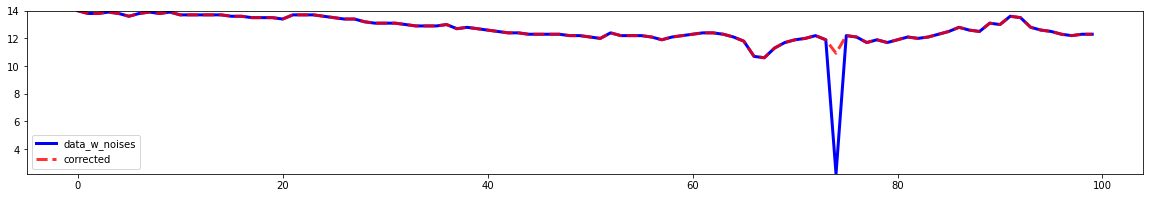

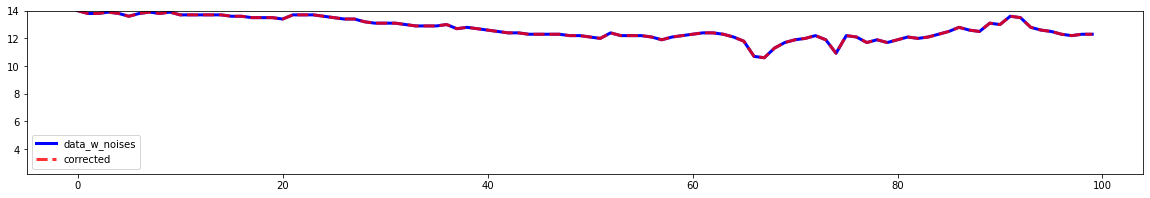

In [787]:
X = ts_data[neighbor[station]]
y = ts_data[station]
corrected_y = smoothpredictor.correct(X, y, True)

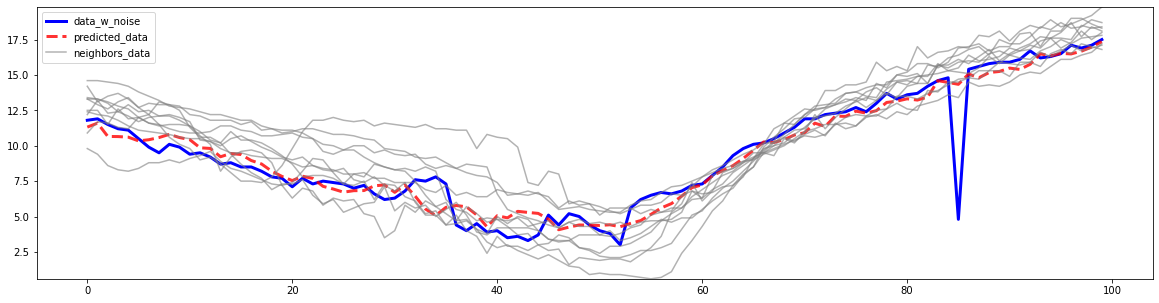

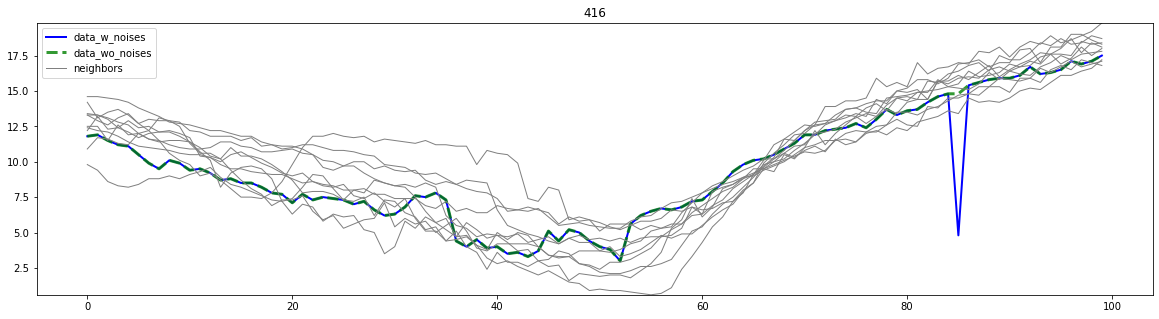

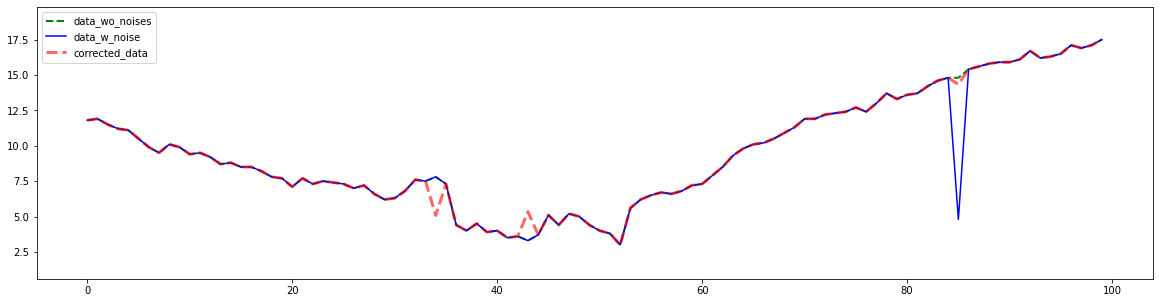

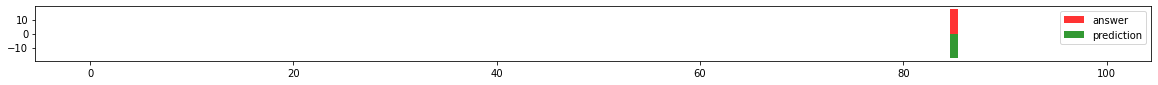

In [721]:
plot_indicators(data, station, pred_by_new, answer, smoothpredictor)